# Basic file manipulation and data loading
We start with the well-known zip code example. The data can be downloaded from the website of [Elements of Statistical Learning](http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.train.gz) book. 
Extract the file and then give the file address to read the text "zip.train" file.

In [1]:
import numpy as np
zipdata=np.loadtxt("../data/zip.train")

In [2]:
print zipdata[:,0]

[ 6.  5.  4. ...,  3.  0.  1.]


The data contains $7291\times 257$ digit samples, first column is the storted digit and the remaining 256 is a $16 \times 16$ grayscale image.
Now we plot the first row of the data.

(-0.5, 15.5, 15.5, -0.5)

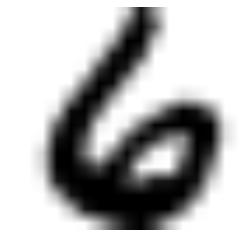

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(-zipdata[0,1:257].reshape(16,16),"gray")# grayscale reversed already
plt.axis("off")

In order to modify the plot remember the pyplot help [here](http://matplotlib.org/api/pyplot_api.html).

Now we create 2 datasets one for the digit 3 and another for the digit 8. 
Then we plot 10 random samples of each dataset.


In [4]:
zipdata3=zipdata[zipdata[:,0]==3]
print zipdata3[:,0].shape
zipdata8=zipdata[zipdata[:,0]==8]
print zipdata8[:,0].shape

(658,)
(542,)


In [5]:
np.random.seed(10)
random3=np.random.choice(range(len(zipdata3)),size=10,replace=False)              

(-0.5, 159.5, 15.5, -0.5)

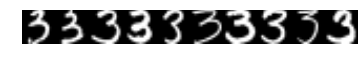

In [6]:
zipdata3stack=zipdata3[random3[0],1:].reshape(16,16)
for i in range(1,len(random3)):
    zipdata3stack=np.hstack((zipdata3stack,
                             zipdata3[random3[i],1:].reshape(16,16)))
plt.imshow(zipdata3stack,"gray")
plt.axis("off")

## Exercise
Plot the 3 digits without loop and vertically.

(-0.5, 15.5, 159.5, -0.5)

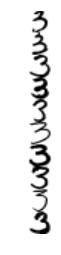

In [7]:
plt.imshow(-zipdata3[random3,1:].reshape(160,16),"gray")
plt.axis("off")

(-0.5, 159.5, 15.5, -0.5)

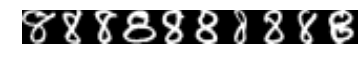

In [8]:
random8=np.random.choice(range(len(zipdata8)),size=10,replace=False)              
zipdata8stack=np.empty((16,16))
zipdata8stack=zipdata8[random8[0],1:].reshape(16,16)
for i in range(1,len(random8)):
    zipdata8stack=np.hstack((zipdata8stack,zipdata8[random8[i],1:].reshape(16,16)))
plt.imshow(zipdata8stack,"gray")
plt.axis("off")

(-0.5, 159.5, 31.5, -0.5)

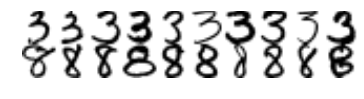

In [9]:
plt.imshow(-np.vstack((zipdata3stack,zipdata8stack)),"gray")
plt.axis("off")

# Principal components projection
Compare two different dimension reduction techniques on all 10 digits data: the principal components and linear discriminant axes. We start with the principal components


In [10]:
from sklearn.decomposition import PCA
from sklearn.lda import LDA

x=zipdata[:,1:]
y=zipdata[:,0]

pca=PCA(n_components=2)
zipdata_pca=pca.fit(x).transform(x)

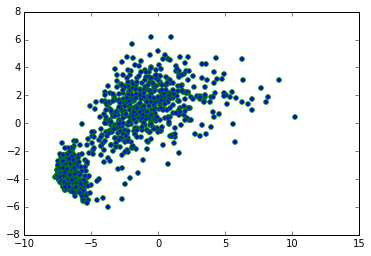

In [11]:
index=(zipdata[:,0]==1) | (zipdata[:,0]==8)
plt.scatter(zipdata_pca[index,0],zipdata_pca[index,1],edgecolor="g")

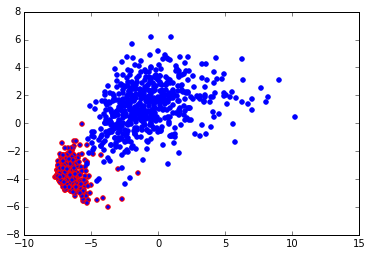

In [12]:
plt.scatter(zipdata_pca[y==1,0],zipdata_pca[y==1,1],edgecolor="r")
plt.scatter(zipdata_pca[y==8,0],zipdata_pca[y==8,1],edgecolor="b")

# Linear discriminant projection
The linear discriminant projection finds a linear combination of the attributes so that they are the most separable possible. It can be shown that the principal component projection is a special case of the linear discriminant projection. For the linear discriminant you require a classification vector. The number of projections in lindear discriminant is maximum the number of class -1.



In [13]:
from sklearn.lda import LDA

x=zipdata[:,1:]
y=zipdata[:,0]

lda=LDA(n_components=3)
zipdata_lda=lda.fit(x,y).transform(x)

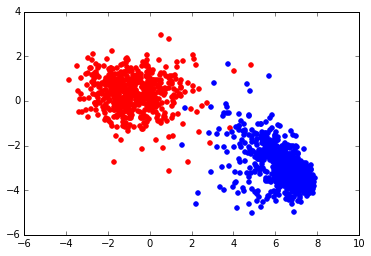

In [14]:
plt.scatter(zipdata_lda[y==8,0],zipdata_lda[y==8,1],edgecolor="r", facecolor="r")
plt.scatter(zipdata_lda[y==1,0],zipdata_lda[y==1,1],edgecolor="b")

# 3D scatter plot
Now lets try 3D plots. In order to see the plot in a new window and rotate the plot using your trackpad or mouse, run "3dscatterplot.ipynb" file.

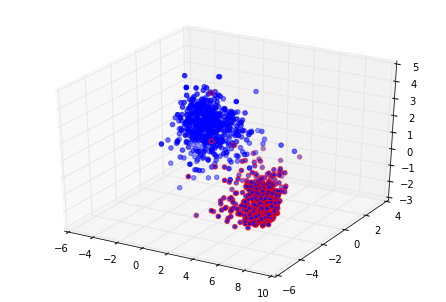

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(zipdata_lda[y==1,0],zipdata_lda[y==1,1],zipdata_lda[y==1,2],edgecolor="r")
ax.scatter(zipdata_lda[y==8,0],zipdata_lda[y==8,1],zipdata_lda[y==8,2],edgecolor="b")

# Exercise
Create a subset of data only including digits 2 and 5. 
Run the binary support vector machines of chapter 3 on the subset of the zip data for only digits 2 and 5.

In [18]:
x_lda=zipdata_lda[index,:]
y_lda=zipdata[index,0]
from sklearn import svm
clf = svm.SVC()
clf.fit(x_lda, y_lda)
y_lda_hat=clf.predict(x_lda)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_lda,y_lda_hat)/float(len(y_lda))

array([[ 0.64835165,  0.00129282],
       [ 0.00129282,  0.3490627 ]])